1.总控制面板

In [16]:
# ==============================================================================
#                      【总控制面板】- 项目参数配置文件
#
#                    您只需要在这里修改，即可控制整个分析流程
# ==============================================================================

# 导入 os 库，这是一个处理文件路径的标准库，能让我们的路径设置更智能、更不容易出错。
import os

# ==============================================================================
# 1. 文件与路径定义区
# ------------------------------------------------------------------------------
# 描述: 这个区域定义了所有输入文件的位置。良好的路径管理是项目可复现的第一步。
# ==============================================================================

# --- 1.1 项目根目录设置 ---
# 通常，我们的 'scripts' 和 'data' 文件夹都在一个总的项目文件夹下。
# '../../' 表示从当前脚本的位置（例如 'scripts/notebooks'）返回两级，到达项目根目录。
# 【请根据您的实际文件结构调整】
PROJECT_ROOT_DIR = '../../'

# --- 1.2 数据输入目录 ---
# 使用 os.path.join() 可以自动根据您的操作系统（Windows/Mac/Linux）使用正确的路径分隔符（'\' 或 '/'）。
RAW_DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'data', 'raw_data')

# --- 1.3 【核心】输入文件字典 ---
# 我们使用一个“字典”来管理所有输入文件，这样做的好处是：
# a. 集中管理，一目了然。
# b. 代码中可以通过键名（如 "protein_matrix"）来调用文件，比直接写死路径更清晰、更安全。
# c. 未来如果新增文件类型（比如修饰组学文件），只需在这里添加一行即可。
INPUT_FILES = {
    # a. DIANN的标准输出矩阵 (用于常规QC和差异分析)
    "protein_matrix": os.path.join(RAW_DATA_DIR, 'report.pg_matrix.tsv'),
    "peptide_matrix": os.path.join(RAW_DATA_DIR, 'report.pr_matrix.tsv'),
    
    # b. DIANN的主报告文件 (通常是 .parquet 或 .tsv，用于更深入的QC)
    "diann_main_report": os.path.join(RAW_DATA_DIR, 'report.parquet'),
    
    # c. (可选) 实验设计/样本信息文件
    # 如果您有一个单独的文件描述了每个样本的元数据（例如批次、处理天数等），可以在这里定义。
    # "sample_metadata": os.path.join(PROJECT_ROOT_DIR, 'metadata', 'sample_info.csv')
}

# --- 1.4 数据输出目录 ---
# 定义一个存放所有分析结果（图表、表格）的文件夹。
OUTPUT_DIR = os.path.join(PROJECT_ROOT_DIR, 'results')
# 我们可以让代码自动创建这个文件夹，如果它还不存在的话
# (这行代码通常放在执行区，但在这里定义路径是合理的)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# --- 1.5 报告设置 ---
# a. 定义当前 Jupyter Notebook 的文件名
#    这是为了让报告生成模块知道应该转换哪一个文件。
#    【重要】请确保这个名字与您保存的 .ipynb 文件名完全一致！
NOTEBOOK_FILE_NAME = 'preprocessing.ipynb' 

# b. 定义最终生成的报告文件名
REPORT_FILE_NAME = 'Full_Analysis_Report.html'

# c. 定义最终生成的【精简版】专业报告的PDF版本文件名
PROFESSIONAL_REPORT_PDF_NAME = 'Professional_Analysis_Report.pdf'

# ==============================================================================
# 2. 样本与分组定义区
# ------------------------------------------------------------------------------·
# 描述: 这里是实验设计的核心。您将告诉代码，哪些样本属于哪个组。
# ==============================================================================

# --- 2.1 样本别名映射 (长名称 -> 短名称) ---
# DIANN输出的列名通常是完整的文件路径，又长又不美观。
# 在这里，我们创建一个“通讯录”，将原始的长名称映射为您想要的、简洁易读的短名称。
# 【重要】请确保左边的“键”（长路径）与您数据文件中的列名完全一致！
# 【技巧】在字符串前加上 'r' (例如 r'D:\...') 可以防止路径中的反斜杠被错误解析，这是一个好习惯。
COLUMN_MAPPING = {
    # 示例 (Windows 路径):
          r'D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d': 'JDL_1',
          r'D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d': 'JDL_2',
          r'D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d': 'JDL_3',
          r'D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d': 'JDL_4',
    # r'D:\2025_Lab_Data\Project_X\raw\Control_1.mzML': 'Control_1',
    # r'D:\2025_Lab_Data\Project_X\raw\Model_1.mzML': 'Model_1',
    
    # 示例 (Linux/Mac 路径):
    # '/data/project_x/raw/JDL_1.mzML': 'JDL_1',
    # '/data/project_x/raw/JDL_2.mzML': 'JDL_2',
}

# --- 2.2 实验分组定义 ---
# 在这里，您将使用上面定义的【短名称】来定义您的实验组。
# 这是一个字典，其中“键”是您的组名（如 'JDL', 'Control'），“值”是一个包含该组所有样本短名称的列表。
GROUP_DEFINITIONS = {
    'JDL_test1': ['JDL_1', 'JDL_2','JDL_3', 'JDL_4'],
   # 'JDL_test2': []
    # 'Control': ['Control_1', 'Control_2', 'Control_3'],
    # 'Model': ['Model_1', 'Model_2', 'Model_3'],
}


# ==============================================================================
# 3. 分析流程控制与参数区
# ------------------------------------------------------------------------------
# 描述: 这里是分析流程的“开关”和“旋钮”。您可以决定执行哪些分析，并调整其细节参数。
# ==============================================================================


# 在【总控制面板】中，用下面的新代码替换掉旧的 3.1 和 3.2 节

# --- 3.1 完整预处理流程控制 ---
#    本节控制数据预处理的三个核心步骤：样本间归一化、数据转换和数据缩放。

# a. 【样本间归一化 (Sample Normalization)】
#    目的：校正样本间的系统性技术偏差（如上样量差异）。
#    当前可选的方法:
#      - 'median': 中位数归一化。稳健且常用。
#      - 'quantile': 分位数归一化。更强的归一化方法。
#      - 'none': 不执行任何归一化。
NORMALIZATION_METHOD = 'median'

# b. 【数据转换 (Data Transformation)】
#    目的：改变数据分布，使其更适合统计分析。
#    当前可选的方法:
#      - 'log2': 进行 Log2(x+1) 转换。最常用的方法。
#      - 'none': 不进行任何转换，保持原始（或归一化后）的线性强度值。
TRANSFORMATION_METHOD = 'log2'

# c. 【数据缩放 (Data Scaling)】
#    目的：消除不同蛋白质（特征）间的尺度差异，主要用于PCA和聚类热图。
#    注意：此设置仅影响PCA图和热图的内部计算，不会改变用于差异分析的数据。
#    当前可选的方法:
#      - 'zscore': Z-score 标准化（均值为0，标准差为1）。最常用的方法。
#      - 'minmax': 最大最小缩放（将数据缩放至0-1范围）。
#      - 'none': 不执行任何缩放。
SCALING_METHOD = 'zscore'



# --- 3.2 数据过滤与填充 ---
# a. 缺失值过滤阈值
#    定义一个蛋白质被保留下来的最低标准。
#    标准: "一个蛋白质必须在【至少一个实验组】中，其有效值的比例达到或超过这个阈值。"
#    例如: 0.7 表示在一个组的10个样本中，该蛋白至少要在7个样本里被检测到。
#    设置为 0.0 则表示不进行任何过滤。
MISSING_VALUE_FILTER_THRESHOLD = 0.0

# b. 缺失值填充方法选择
#    在这里选择您想使用的填充方法。代码将根据您的选择调用相应的函数。
#    当前可选的方法:
#      - 'knn': K-近邻填充。
#      - 'min': 全局最小值填充。
#      - 'none': 不进行任何填充，保留NaN值。
#    未来可以轻松扩展，例如添加 'mean', 'median', 'bpca' 等。
IMPUTATION_METHOD = 'knn'

# c. (可选) KNN填充的参数
#    设置KNN算法寻找多少个“邻居”来进行填充。
#    通常设置为 3 到 10 之间的一个整数。
KNN_N_NEIGHBORS = 5


# --- 3.3 质量控制 (QC) 分析 ---
# a. 污染物关键词列表
# 定义一个列表，包含您希望从数据中移除的常见污染物相关的关键词。
CONTAMINANT_KEYWORDS = ['KRT', 'Keratin', 'Trypsin', 'trypsin']

# b. 组间韦恩图的有效值阈值 (仅在多组分析时生效)
#    标准："一个蛋白质必须在一个组内至少达到此比例的样本中被鉴定，才能代表该组参与组间比较。"
#    例如: 0.7 表示在一个有3个重复的组中，蛋白至少要在 2.1 (即3) 个样本中出现。
#    设置为 1.0 表示要求在所有重复中都出现。
INTER_GROUP_VENN_THRESHOLD = 0.7

# --- 3.4 差异表达分析 ---
# a. 定义要进行比较的组
# 这是一个列表，其中每个元素都是一个包含两个组名的元组 `(组1, 组2)`。
# 代码将自动为列表中的每一对组合进行差异分析 (组1 vs 组2)。
# 【重要】如果您的数据只有一个组，或者您暂时不想进行差异分析，请将此列表设置为空 `[]`。
COMPARISON_PAIRS = [
   # ('NAT', 'T' ),  # 这将触发 Model 组 vs Control 组的比较
    # ('JDL', 'Control'),   # 您也可以定义多对比较
]

# b. 差异筛选统计阈值
# 只有同时满足以下两个条件的蛋白质才被认为是“显著差异”的。
P_VALUE_THRESHOLD = 0.05  # P值的筛选阈值 (通常设为 0.05 或 0.01)。
LOG2_FC_THRESHOLD = 1.0   # Log2 Fold Change (倍数变化) 的阈值。1.0 代表 2 倍差异，0.58 代表 1.5 倍差异。

# --- 3.5 功能富集分析 (GO/KEGG) ---
# a. 物种设置
# 为GO/KEGG分析指定物种。请使用标准的物种名称或代码。
# 常见物种: 'human', 'mouse', 'rat'。
SPECIES_FOR_ENRICHMENT = 'human'

# b. GO/KEGG 富集分析的P值阈值
# 用于筛选显著富集的功能条目或通路。
ENRICHMENT_P_VALUE_THRESHOLD = 0.05

# ==============================================================================
# 4. 可视化参数区
# ------------------------------------------------------------------------------
# 描述: 统一管理所有图表的视觉风格，确保报告的美观和一致性。
# ==============================================================================

# # --- 4.1 调色板定义 ---
# # 为您的不同实验组定义专属颜色，让图表（如PCA图、火山图）的颜色保持一致。
# # 您可以使用颜色名称（如 'blue'）或十六进制代码（如 '#3498db'）。
GROUP_COLORS = {
    'JDL_test1': 'skyblue',
   # 'T': 'orange',
    'Control': '#2ecc71', # 绿色
    'Model': '#e74c3c',   # 红色
}

# --- 4.2 字体大小设置 ---
# 统一控制图表的标题和坐标轴标签的字体大小。
FIGURE_TITLE_FONTSIZE = 16
AXIS_LABEL_FONTSIZE = 12


# ==============================================================================
#                      【配置核对与信息打印】
#          (生成一份详细的配置报告，便于日后回顾和问题排查)
# ==============================================================================

print("\n" + "="*60)
print("✅ 【总控制面板】配置加载成功！正在生成您的项目配置总览...")
print("="*60)

# --- 1. 文件与路径总览 ---
print("\n【1. 文件与路径信息】")
print(f"  - 项目根目录 (PROJECT_ROOT_DIR): {PROJECT_ROOT_DIR}")
print(f"  - 结果输出目录 (OUTPUT_DIR)    : {OUTPUT_DIR}")
print("  - 使用的输入文件 (INPUT_FILES):")
# 循环打印所有输入文件，而不是只打印一个
for key, path in INPUT_FILES.items():
    print(f"    - {key:<20}: {path}") # {:<20} 是为了让输出对齐，更美观

# --- 2. 样本与分组定义 ---
print("\n【2. 样本与分组定义】")
if COLUMN_MAPPING:
    print("  - 样本别名映射 (长名称 -> 短名称):")
    for long_name, short_name in COLUMN_MAPPING.items():
        print(f"    - '{short_name}'  <-  '{long_name}'")
else:
    print("  - 未定义样本别名映射。")

if GROUP_DEFINITIONS:
    print("  - 实验分组定义 (GROUP_DEFINITIONS):")
    for group, samples in GROUP_DEFINITIONS.items():
        print(f"    - 组 '{group}': 包含 {len(samples)} 个样本 -> {samples}")
else:
    print("  - 未定义实验分组。")

# --- 3. 分析流程控制与参数 ---
print("\n【3. 分析流程控制与参数】")
print("  - 污染物筛选关键词:")
print(f"    - {CONTAMINANT_KEYWORDS}")
print("  - 差异分析设置:")
if COMPARISON_PAIRS:
    print(f"    - P值阈值: {P_VALUE_THRESHOLD}")
    print(f"    - Log2FC阈值: {LOG2_FC_THRESHOLD}")
    print("    - 计划的组间比较:")
    for pair in COMPARISON_PAIRS:
        print(f"      - {pair[0]} vs {pair[1]}")
else:
    print("    - 未定义差异分析比较，将跳过相关步骤。")

print("  - 功能富集分析设置:")
print(f"    - 物种: {SPECIES_FOR_ENRICHMENT}")
print(f"    - 富集P值阈值: {ENRICHMENT_P_VALUE_THRESHOLD}")

# --- 4. 可视化参数 ---
print("\n【4. 可视化参数】")
if GROUP_COLORS:
    print("  - 分组颜色定义 (GROUP_COLORS):")
    for group, color in GROUP_COLORS.items():
        print(f"    - 组 '{group}': {color}")
else:
    print("  - 未定义分组颜色。")
print("  - 字体大小设置:")
print(f"    - 图表标题: {FIGURE_TITLE_FONTSIZE} | 坐标轴标签: {AXIS_LABEL_FONTSIZE}")

print("\n" + "="*60)
print("配置总览打印完毕。后续分析将严格按照以上参数执行。")
print("="*60)


✅ 【总控制面板】配置加载成功！正在生成您的项目配置总览...

【1. 文件与路径信息】
  - 项目根目录 (PROJECT_ROOT_DIR): ../../
  - 结果输出目录 (OUTPUT_DIR)    : ../../results
  - 使用的输入文件 (INPUT_FILES):
    - protein_matrix      : ../../data/raw_data/report.pg_matrix.tsv
    - peptide_matrix      : ../../data/raw_data/report.pr_matrix.tsv
    - diann_main_report   : ../../data/raw_data/report.parquet

【2. 样本与分组定义】
  - 样本别名映射 (长名称 -> 短名称):
    - 'JDL_1'  <-  'D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d'
    - 'JDL_2'  <-  'D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d'
    - 'JDL_3'  <-  'D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d'
    - 'JDL_4'  <-  'D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d'
  - 实验分组定义 (GROUP_DEFINITIONS):
    - 组 'JDL_test1': 包含 4 个样本 -> ['JDL_1', 'JDL_2', 'JDL_3', 'JDL_4']

【3. 分析流程控制与参数】
  - 污染物筛选关键词:
    - ['KRT', 'Keratin', 'Trypsin', 'trypsin']
  - 差异分析设置:
    - 未定义差异分析比较，将跳过相关步骤。
  - 功能富集分析设置:
    - 物种: human
    - 富集P值阈值: 0.05

【4. 可视化参数】
  - 分组颜色定义 (GROUP

2.数据加载与预处理

--- 准备启动【模块一】的完整预处理流程 ---
✅ 配置信息打包成功。

【模块一】函数开始执行：完整预处理流程 (详细过程模式)

--- 步骤 1: 智能加载所有输入文件 ---
  [✅ 加载成功] 'protein_matrix' (共 4303 行)
  [✅ 加载成功] 'peptide_matrix' (共 23810 行)


--- 步骤 2: 基础预处理 ---
📝 原始数据预览:


,Protein.Group,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,D:\20250902_SP_pre_experiment_1_data\JDL_1_RC7_1_32932.d,D:\20250902_SP_pre_experiment_1_data\JDL_2_RC8_1_32933.d,D:\20250902_SP_pre_experiment_1_data\JDL_3_RD1_1_32934.d,D:\20250902_SP_pre_experiment_1_data\JDL_4_RD2_1_32935.d
0,A0A075B5N3;A0A0G2JE47;Q6KB05,A0A075B5N3_MOUSE;A0A0G2JE47_MOUSE;Q6KB05_MOUSE,Igkv8-28;scFv,NaN,1,0,NaN,9172.38,314348.0,14467.6
1,A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,A0A075B5P5_MOUSE;A0A1Y7VJN6_MOUSE;A0A4U9FKB1_M...,Ighg3,NaN,1,1,18983.3,NaN,NaN,22708.1
2,A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0...,A0A087WNW3_MOUSE;A0A087WP14_MOUSE;A0A087WP48_M...,Ktn1,NaN,9,7,125996.0,143374.00,NaN,169145.0



✨ 基础处理后预览:


,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,JDL_1,JDL_2,JDL_3,JDL_4
Protein.Group,,,,,,,,,
A0A075B5N3;A0A0G2JE47;Q6KB05,A0A075B5N3_MOUSE;A0A0G2JE47_MOUSE;Q6KB05_MOUSE,Igkv8-28;scFv,NaN,1,0,NaN,9172.38,314348.0,14467.6
A0A075B5P5;A0A1Y7VJN6;A0A4U9FKB1;Q6KAM2,A0A075B5P5_MOUSE;A0A1Y7VJN6_MOUSE;A0A4U9FKB1_M...,Ighg3,NaN,1,1,18983.3,NaN,NaN,22708.1
A0A087WNW3;A0A087WP14;A0A087WP48;A0A087WP85;A0A087WPW5;A0A087WPX0;A0A087WQ25;A0A087WQD0;A0A087WQF8;A0A087WQG4;A0A087WQI3;A0A087WQQ5;A0A087WRS1;A0A087WS04;A0A087WS23;A0A087WS29;F8VQC7,A0A087WNW3_MOUSE;A0A087WP14_MOUSE;A0A087WP48_M...,Ktn1,NaN,9,7,125996.0,143374.00,NaN,169145.0




--- 步骤 3: 污染物移除 ---
  - [执行] 已移除污染物，蛋白质数量从 4303 减少到 4303。


--- 步骤 4: 缺失值过滤 ---
  - [保存] 已创建 'protein_matrix_filtered' 版本，用于鉴定重叠分析。


--- 步骤 5: 缺失值填充 ---
  - 选择的填充方法: 'knn'
  - [执行] KNN 填充完成。


--- 步骤 6: 样本间归一化 ---
  - 选择的方法: 'median'


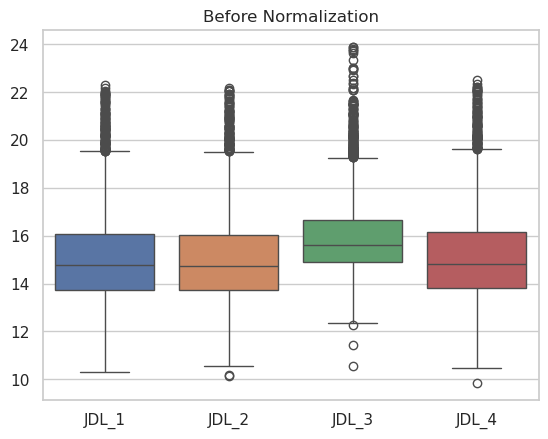

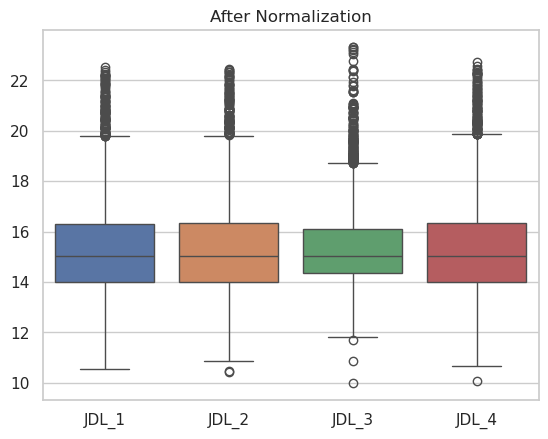



--- 步骤 7: 数据转换 ---
  - 选择的方法: 'log2'
  - [完成] 已创建 'protein_matrix_log2'。

【模块一】函数执行完毕！


--- 【模块一】总流程执行完毕 ---
✅ 所有数据已按正确顺序预处理完毕。
   - 您现在可以使用 `loaded_data` 变量了，它包含了以下数据版本:
     - `protein_matrix_normalized`: 用于计算Fold Change的线性强度值。
     - `protein_matrix_log2`: 用于QC和统计检验的Log2转换值。


In [17]:
# ==============================================================================
#                      【模块一 - 终极完美版 v3】(增加`_filtered`输出)
# ==============================================================================
import pandas as pd; 
import numpy as np; 
import os; 
from IPython.display import display, HTML; 
import matplotlib.pyplot as plt; 
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer

def run_full_preprocessing_pipeline_verbose(config):
    print("\n" + "="*80); print("【模块一】函数开始执行：完整预处理流程 (详细过程模式)"); print("="*80)
    loaded_dataframes = {}; print("\n--- 步骤 1: 智能加载所有输入文件 ---")
    for file_key, file_path in config['INPUT_FILES'].items():
        if os.path.exists(file_path):
            try:
                if file_path.endswith('.tsv'): df = pd.read_csv(file_path, sep='\t')
                else: continue
                loaded_dataframes[file_key] = df; print(f"  [✅ 加载成功] '{file_key}' (共 {len(df)} 行)")
            except Exception as e: print(f"  [❌ 读取错误] '{file_key}'. 错误: {e}")
        else: print(f"  [⚠️ 文件缺失] '{file_key}'，已跳过。")
    if 'protein_matrix' not in loaded_dataframes: print("\n[❌ 错误] 未找到 'protein_matrix'。"); return {}
    protein_df = loaded_dataframes.pop('protein_matrix').copy()
    print("\n\n--- 步骤 2: 基础预处理 ---"); print("📝 原始数据预览:"); display(protein_df.head(3))
    if 'Protein.Group' in protein_df.columns: protein_df.set_index('Protein.Group', inplace=True);
    if config.get('COLUMN_MAPPING'): protein_df.rename(columns=config['COLUMN_MAPPING'], inplace=True);
    print("\n✨ 基础处理后预览:"); display(protein_df.head(3))
    print("\n\n--- 步骤 3: 污染物移除 ---")
    if config.get('CONTAMINANT_KEYWORDS'):
        initial_count = len(protein_df)
        if 'Genes' in protein_df.columns:
            protein_df = protein_df[~protein_df['Genes'].str.contains('|'.join(config['CONTAMINANT_KEYWORDS']), na=False)]
            print(f"  - [执行] 已移除污染物，蛋白质数量从 {initial_count} 减少到 {len(protein_df)}。")
    print("\n\n--- 步骤 4: 缺失值过滤 ---")
    filter_threshold = config.get('MISSING_VALUE_FILTER_THRESHOLD', 0.0)
    if filter_threshold > 0.0:
        initial_count = len(protein_df); print(f"  - 过滤标准: 蛋白质必须在至少一个组中，有 ≥ {filter_threshold:.0%} 的有效值。")
        proteins_to_keep = pd.Series(False, index=protein_df.index)
        for group_name, samples in config['GROUP_DEFINITIONS'].items():
            group_samples = [s for s in samples if s in protein_df.columns]
            if not group_samples: continue
            valid_ratio = protein_df[group_samples].notna().sum(axis=1) / len(group_samples)
            proteins_to_keep = proteins_to_keep | (valid_ratio >= filter_threshold)
        protein_df = protein_df[proteins_to_keep]
        print(f"  - [执行] 过滤后，剩余蛋白质数量: {len(protein_df)} (移除了 {initial_count - len(protein_df)} 个)")
    loaded_dataframes['protein_matrix_filtered'] = protein_df.copy(); print("  - [保存] 已创建 'protein_matrix_filtered' 版本，用于鉴定重叠分析。")
    print("\n\n--- 步骤 5: 缺失值填充 ---"); imputation_method = config.get('IMPUTATION_METHOD', 'none'); print(f"  - 选择的填充方法: '{imputation_method}'")
    quant_cols = [col for group_list in config['GROUP_DEFINITIONS'].values() for col in group_list if col in protein_df.columns]
    if protein_df[quant_cols].isna().sum().sum() > 0 and imputation_method != 'none':
        if imputation_method == 'knn':
            imputer = KNNImputer(n_neighbors=config.get('KNN_N_NEIGHBORS', 5)); protein_df[quant_cols] = pd.DataFrame(imputer.fit_transform(protein_df[quant_cols]), index=protein_df.index, columns=quant_cols); print("  - [执行] KNN 填充完成。")
    print("\n\n--- 步骤 6: 样本间归一化 ---"); normalization_method = config.get('NORMALIZATION_METHOD', 'none'); print(f"  - 选择的方法: '{normalization_method}'")
    if normalization_method != 'none' and quant_cols:
        quant_df_before_norm = protein_df[quant_cols].copy(); plt.figure(); sns.boxplot(data=np.log2(quant_df_before_norm.replace(0, np.nan) + 1)); plt.title('Before Normalization'); plt.show(); plt.close()
        if normalization_method == 'median':
            medians = quant_df_before_norm.replace(0, np.nan).median(); grand_median = medians.mean(); scaling_factors = grand_median / medians; normalized_df = quant_df_before_norm.multiply(scaling_factors, axis=1)
        elif normalization_method == 'quantile':
            df_sorted = pd.DataFrame(np.sort(quant_df_before_norm.values, axis=0), index=quant_df_before_norm.index); rank_mean = df_sorted.mean(axis=1); rank_mean.index = np.arange(1, len(rank_mean) + 1); df_ranked = quant_df_before_norm.rank(method='min').astype(int); normalized_df = df_ranked.apply(lambda col: col.map(rank_mean))
        protein_df[quant_cols] = normalized_df; plt.figure(); sns.boxplot(data=np.log2(protein_df[quant_cols].replace(0, np.nan) + 1)); plt.title('After Normalization'); plt.show(); plt.close()
    loaded_dataframes['protein_matrix_normalized'] = protein_df
    print("\n\n--- 步骤 7: 数据转换 ---"); transformation_method = config.get('TRANSFORMATION_METHOD', 'none'); print(f"  - 选择的方法: '{transformation_method}'")
    if transformation_method == 'log2':
        protein_df_log2 = protein_df.copy(); protein_df_log2[quant_cols] = np.log2(protein_df[quant_cols] + 1); loaded_dataframes['protein_matrix_log2'] = protein_df_log2; print("  - [完成] 已创建 'protein_matrix_log2'。")
    print("\n" + "="*80); print("【模块一】函数执行完毕！"); print("="*80); return loaded_dataframes

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块一】的完整预处理流程 ---")
try:
    # 打包所有需要的配置 (包含所有新旧配置项)
    config = {
        'PROJECT_ROOT_DIR': PROJECT_ROOT_DIR, 'INPUT_FILES': INPUT_FILES, 'OUTPUT_DIR': OUTPUT_DIR, 
        'COLUMN_MAPPING': COLUMN_MAPPING, 'GROUP_DEFINITIONS': GROUP_DEFINITIONS, 
        'COMPARISON_PAIRS': COMPARISON_PAIRS, 'P_VALUE_THRESHOLD': P_VALUE_THRESHOLD, 
        'LOG2_FC_THRESHOLD': LOG2_FC_THRESHOLD, 'CONTAMINANT_KEYWORDS': CONTAMINANT_KEYWORDS, 
        'SPECIES_FOR_ENRICHMENT': SPECIES_FOR_ENRICHMENT, 'ENRICHMENT_P_VALUE_THRESHOLD': ENRICHMENT_P_VALUE_THRESHOLD,
        'GROUP_COLORS': GROUP_COLORS, 'FIGURE_TITLE_FONTSIZE': FIGURE_TITLE_FONTSIZE,
        'AXIS_LABEL_FONTSIZE': AXIS_LABEL_FONTSIZE,
        'MISSING_VALUE_FILTER_THRESHOLD': MISSING_VALUE_FILTER_THRESHOLD,
        'IMPUTATION_METHOD': IMPUTATION_METHOD, 'KNN_N_NEIGHBORS': KNN_N_NEIGHBORS,
        'NORMALIZATION_METHOD': NORMALIZATION_METHOD,
        'TRANSFORMATION_METHOD': TRANSFORMATION_METHOD,
        'SCALING_METHOD': SCALING_METHOD
    }
    print("✅ 配置信息打包成功。")
    
    # 【核心】调用完整的预处理函数
    loaded_data = run_full_preprocessing_pipeline_verbose(config)
    
    print("\n\n--- 【模块一】总流程执行完毕 ---")
    print("✅ 所有数据已按正确顺序预处理完毕。")
    print("   - 您现在可以使用 `loaded_data` 变量了，它包含了以下数据版本:")
    if 'protein_matrix_normalized' in loaded_data: print("     - `protein_matrix_normalized`: 用于计算Fold Change的线性强度值。")
    if 'protein_matrix_log2' in loaded_data: print("     - `protein_matrix_log2`: 用于QC和统计检验的Log2转换值。")
    
except NameError as e:
    print(f"\n❌ 错误: 【总控制面板】中的变量未定义。请确保已运行该单元格。错误: {e}")

3.智能质量控制（QC）分析

--- 准备启动【模块二】 ---
✅ `loaded_data` 和 `config` 已找到。

🚀 即将执行智能质量控制 (QC) 分析...

【模块二】函数开始执行：智能质量控制 (QC) 分析


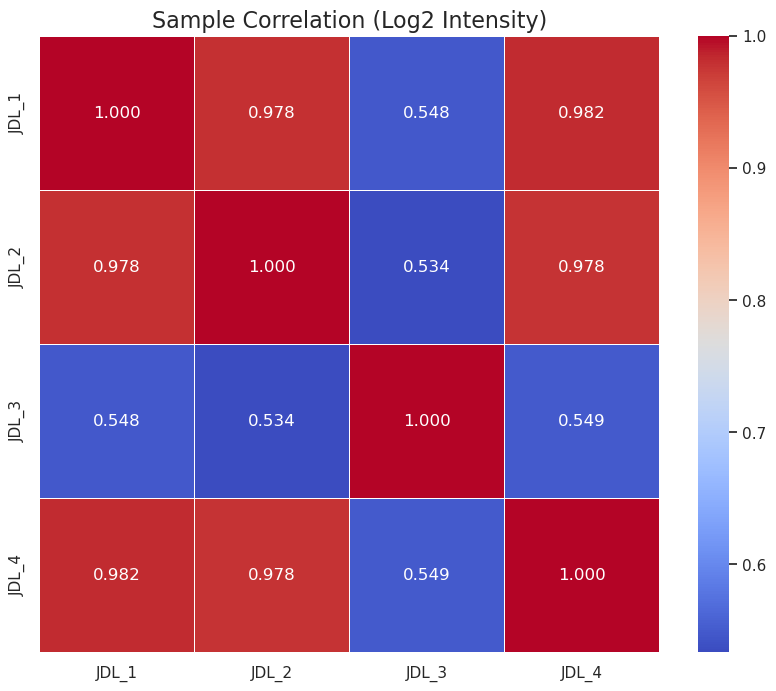

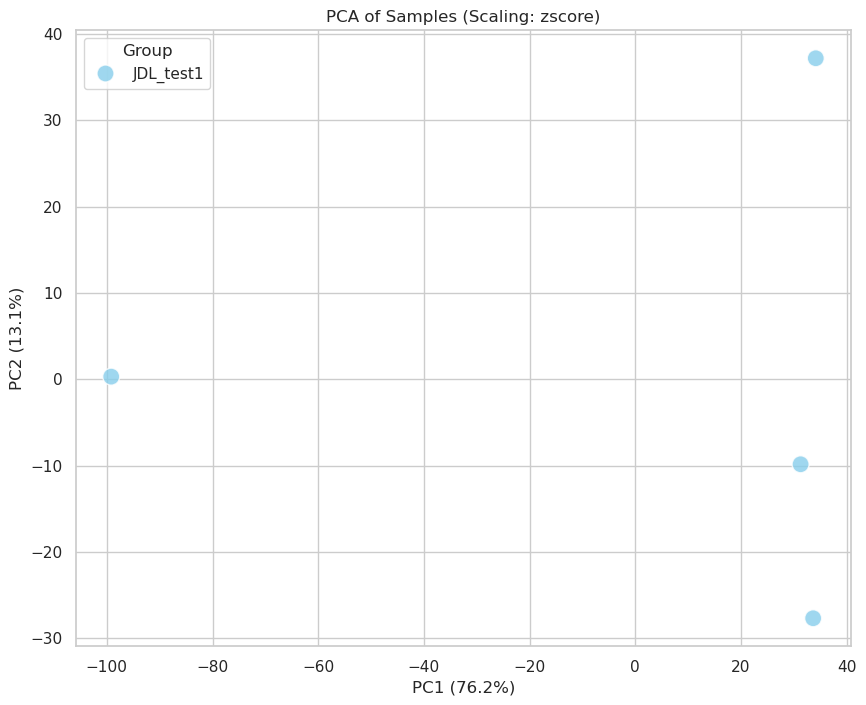

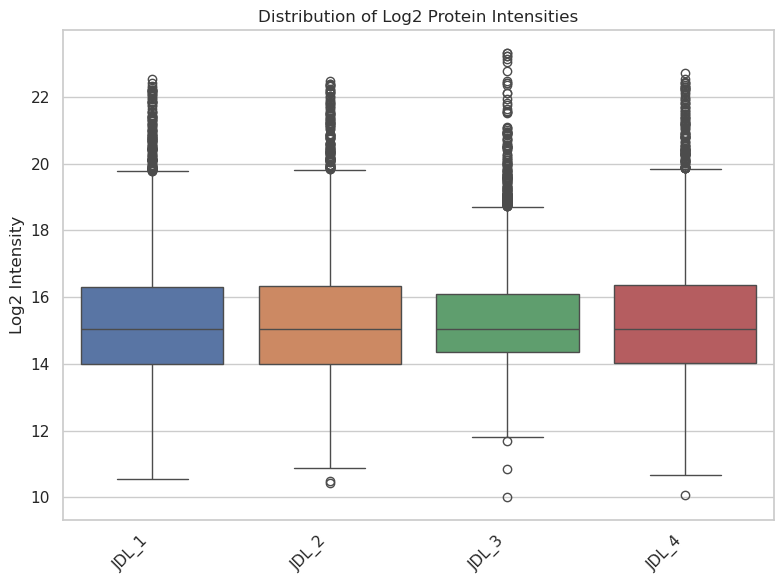

/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/judelong/miniconda3/envs/bioinfo/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sty

<Figure size 1000x600 with 0 Axes>

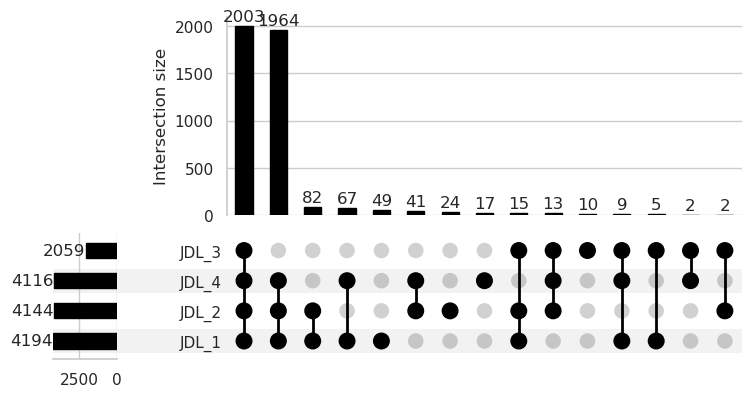

CV中位数 < 20% 表示重复性良好。
  - 组 'JDL_test1' 的CV中位数: 29.42%


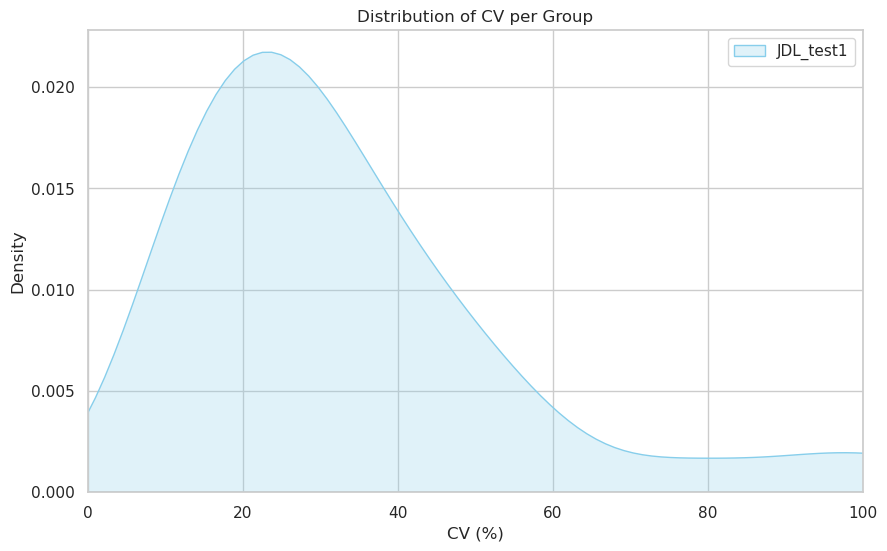


【模块二】函数执行完毕！


--- 【模块二】总流程执行完毕 ---


In [18]:
# ==============================================================================
#                      【模块二 - 终极版】智能QC分析 (内置Scaling & 零方差保护)
#
#    本版本遵循最佳实践：Data Scaling在PCA函数内部按需执行，
#    并内置了“零方差”保护，以确保StandardScaler的稳健运行。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与辅助函数定义区
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from IPython.display import display, HTML

try:
    from matplotlib_venn import venn2, venn3
except ImportError:
    print("正在安装 'matplotlib-venn' 库...")
    !pip install matplotlib-venn
    from matplotlib_venn import venn2, venn3

try:
    from upsetplot import from_contents, UpSet
except ImportError:
    print("正在安装 'upsetplot' 库...")
    !pip install upsetplot
    from upsetplot import from_contents, UpSet

sns.set_theme(style="whitegrid")

# --- 辅助绘图函数 ---

def plot_venn_diagram(dataframe, columns, title):
    """为2或3个重复绘制韦恩图。"""
    sets = [set(dataframe[col].dropna().index) for col in columns]
    plt.figure(figsize=(8, 6))
    if len(sets) == 2:
        venn2(sets, set_labels=columns)
    elif len(sets) == 3:
        venn3(sets, set_labels=columns)
    plt.title(title, fontsize=14)
    plt.show()
    plt.close()

def plot_inter_group_venn(dataframe, group_definitions, threshold, config):
    """为2或3个大组绘制组间比较韦恩图。"""
    num_groups = len(group_definitions)
    if not (2 <= num_groups <= 3):
        print(f"  [ℹ️ 信息] 组的数量 ({num_groups}) 不在2-3之间，跳过组间韦恩图。")
        return

    display(HTML(f"<h3>组间鉴定重叠分析 (阈值: ≥ {threshold:.0%})</h3>"))
    
    group_sets = []
    group_labels = []
    
    for group_name, samples in group_definitions.items():
        if not samples: continue
        # 计算每个蛋白在该组的有效值比例
        valid_ratio = dataframe[samples].notna().sum(axis=1) / len(samples)
        # 筛选出满足阈值的蛋白ID，构成一个集合
        stable_proteins = set(valid_ratio[valid_ratio >= threshold].index)
        group_sets.append(stable_proteins)
        group_labels.append(group_name)
        print(f"  - 组 '{group_name}' 的稳定蛋白质数量: {len(stable_proteins)}")

    plt.figure(figsize=(8, 6))
    if num_groups == 2:
        venn2(group_sets, set_labels=group_labels)
    elif num_groups == 3:
        venn3(group_sets, set_labels=group_labels)
    plt.title('Inter-Group Protein Overlap', fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16))
    plt.show()
    plt.close()

def plot_upset_plot(dataframe, columns, title):
    """为超过3个重复绘制Upset图。"""
    contents = {col: dataframe[col].dropna().index for col in columns}
    upset_data = from_contents(contents)
    plt.figure(figsize=(10, 6))
    UpSet(
        upset_data, 
        subset_size='count', 
        sort_by='cardinality', 
        show_counts=True
    ).plot()
    plt.suptitle(title, fontsize=14)
    plt.show()
    plt.close()

def plot_quantitative_qc(quant_df_log2, config, group_mapping):
    """执行所有定量的QC分析，并在PCA内部执行可配置的Data Scaling。"""
    columns_for_qc = quant_df_log2.columns
    
    # 1. 相关性热图
    display(HTML("<h4>样本间相关性热图 (Correlation Heatmap)</h4>"))
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        quant_df_log2.corr(method='pearson'),
        annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5
    )
    plt.title('Sample Correlation (Log2 Intensity)', fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16))
    plt.show()
    plt.close()

    # 2. 主成分分析 (PCA)
    display(HTML(f"<h4>主成分分析 (PCA Plot) - (内部缩放方法: {config.get('SCALING_METHOD', 'none')})</h4>"))
    pca_data = quant_df_log2.dropna()
    if pca_data.shape[0] < 2:
        print("  [⚠️ 警告] 数据不足以进行PCA分析。")
    else:
        # a. 零方差过滤
        data_for_scaling = pca_data.T
        stds = data_for_scaling.std()
        epsilon = 1e-9
        if (stds < epsilon).any():
            num_zero_variance = (stds < epsilon).sum()
            print(f"  [ℹ️ 信息] 发现了 {num_zero_variance} 个零方差蛋白质，已在PCA的数据缩放前将其移除。")
            data_for_scaling = data_for_scaling.loc[:, stds > epsilon]
        
        # b. 在函数内部，根据配置执行Data Scaling
        scaling_method = config.get('SCALING_METHOD', 'none')
        if scaling_method == 'zscore':
            scaler = StandardScaler(); scaled_data = scaler.fit_transform(data_for_scaling)
        elif scaling_method == 'minmax':
            scaler = MinMaxScaler(); scaled_data = scaler.fit_transform(data_for_scaling)
        else: # 'none'
            scaled_data = data_for_scaling.values
        
        # c. PCA计算
        pca = PCA(n_components=2); principal_components = pca.fit_transform(scaled_data)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']); pca_df['Sample'] = columns_for_qc; pca_df['Group'] = pca_df['Sample'].map(group_mapping)
        
        # d. 绘图
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PC1', y='PC2', hue='Group', data=pca_df, palette=config.get('GROUP_COLORS'), s=150, alpha=0.8, edgecolor="w", linewidth=1)
        # for i, sample in enumerate(pca_df['Sample']):
        #     plt.text(pca_df['PC1'][i], pca_df['PC2'][i] * 1.01, sample, fontsize=9, ha='center')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})'); plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
        plt.title(f'PCA of Samples (Scaling: {scaling_method})'); plt.show(); plt.close()

    # 3. 箱线图
    display(HTML("<h4>蛋白丰度分布箱线图 (Box Plot)</h4>"))
    num_samples = len(columns_for_qc)
    fig_width = min(20, max(8, num_samples * 0.8))
    plt.figure(figsize=(fig_width, 6))
    sns.boxplot(data=quant_df_log2)
    plt.title('Distribution of Log2 Protein Intensities'); plt.ylabel('Log2 Intensity'); plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show(); plt.close()

def plot_cv_distribution(protein_df_normalized, group_definitions, config):
    """为每个组计算并可视化CV分布，增加数值稳定性处理。"""
    display(HTML("<h3>组内重复的变异系数 (CV) 分布</h3>")); print("CV中位数 < 20% 表示重复性良好。")
    plt.figure(figsize=(10, 6)); all_cvs = []
    for group_name, samples in group_definitions.items():
        if len(samples) < 2: continue
        group_df = protein_df_normalized[samples].dropna()
        epsilon = 1e-9; mean_values = group_df.mean(axis=1); std_values = group_df.std(axis=1)
        cv = pd.Series(np.nan, index=group_df.index); valid_mask = mean_values > epsilon
        cv[valid_mask] = (std_values[valid_mask] / mean_values[valid_mask]) * 100; cv.dropna(inplace=True)
        all_cvs.append(cv.rename(group_name))
        if not cv.empty: print(f"  - 组 '{group_name}' 的CV中位数: {cv.median():.2f}%")
    if all_cvs:
        cv_df = pd.concat(all_cvs, axis=1); sns.kdeplot(data=cv_df, fill=True, common_norm=False, palette=config.get('GROUP_COLORS')); plt.title('Distribution of CV per Group'); plt.xlabel('CV (%)'); plt.xlim(0, 100); plt.show(); plt.close()

# --- 【新增】辅助函数: 用于绘制组间韦恩图 ---
def plot_inter_group_venn(dataframe, group_definitions, threshold, config):
    """为2或3个大组绘制组间比较韦恩图。"""
    num_groups = len(group_definitions)
    if not (2 <= num_groups <= 3):
        print(f"  [ℹ️ 信息] 组的数量 ({num_groups}) 不在2-3之间，跳过组间韦恩图。")
        return

    display(HTML(f"<h3>组间鉴定重叠分析 (阈值: ≥ {threshold:.0%})</h3>"))
    
    group_sets = []
    group_labels = []
    
    for group_name, samples in group_definitions.items():
        if not samples: continue
        
        # 使用传入的、未填充的数据计算有效值比例
        valid_ratio = dataframe[samples].notna().sum(axis=1) / len(samples)
        
        # 筛选出满足阈值的蛋白ID，构成一个集合
        stable_proteins = set(valid_ratio[valid_ratio >= threshold].index)
        group_sets.append(stable_proteins)
        group_labels.append(group_name)
        print(f"  - 组 '{group_name}' 的稳定蛋白质数量: {len(stable_proteins)}")

    plt.figure(figsize=(8, 6))
    if num_groups == 2:
        venn2(group_sets, set_labels=group_labels)
    elif num_groups == 3:
        venn3(group_sets, set_labels=group_labels)
    
    plt.title('Inter-Group Protein Overlap', fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16))
    plt.show()
    plt.close()



def run_intelligent_qc_analysis(data_dict, config):
    """
    【最终版】根据实验设计，使用正确的数据版本执行最合适的QC分析流程。
    """
    print("\n" + "="*80)
    print("【模块二】函数开始执行：智能质量控制 (QC) 分析")
    print("="*80)

    # 1. 检查所有需要的数据版本是否存在
    required_keys = ['protein_matrix_normalized', 'protein_matrix_filtered']
    if not all(key in data_dict for key in required_keys):
        print(f"  [❌ 错误] 缺少所需数据版本 (如 'protein_matrix_filtered')。请确保【模块一】已是最新版并成功运行。")
        return
    
    # 2. 为不同分析分配正确的数据版本
    protein_df_normalized = data_dict['protein_matrix_normalized']
    protein_df_filtered = data_dict['protein_matrix_filtered'] # 用于所有鉴定重叠分析
    protein_df_log2 = data_dict.get('protein_matrix_log2') 
    group_definitions = config['GROUP_DEFINITIONS']
    
    # 3. 根据组数选择分析模式
    if len(group_definitions) == 1:
        # --- 单组分析模式 ---
        group_name = list(group_definitions.keys())[0]
        samples = group_definitions[group_name]
        if len(samples) < 2:
            print("\n  [⚠️ 警告] 组内只有一个样本，无法进行重复性分析。"); return
            
        if protein_df_log2 is not None:
            display(HTML("<h3>定量重复性分析 (基于Log2数据)</h3>"))
            group_mapping = {sample: group_name for sample in samples}
            plot_quantitative_qc(protein_df_log2[samples], config, group_mapping)
            
        display(HTML("<h3>鉴定重复性分析 (基于未填充数据)</h3>"))
        plot_venn_or_upset(protein_df_filtered, samples, f"Protein Overlap within '{group_name}' Group")
        
        plot_cv_distribution(protein_df_normalized, group_definitions, config)
        
    elif len(group_definitions) > 1:
        # --- 多组分析模式 ---
        all_samples = [s for samples in group_definitions.values() for s in samples]
        
        if protein_df_log2 is not None:
            display(HTML("<h3>定量重复性与组间差异分析 (基于Log2数据)</h3>"))
            group_mapping = {s: g for g, samples in group_definitions.items() for s in samples}
            plot_quantitative_qc(protein_df_log2[all_samples], config, group_mapping)
            
        display(HTML("<h3>各组内部的鉴定重复性分析 (基于未填充数据)</h3>"))
        for group_name, samples in group_definitions.items():
            if len(samples) >= 2:
                plot_venn_or_upset(protein_df_filtered, samples, f"Protein Overlap within '{group_name}' Group")
        
        # 【新增调用】
        plot_inter_group_venn(
            protein_df_filtered, # 使用未填充数据
            group_definitions, 
            config.get('INTER_GROUP_VENN_THRESHOLD', 0.7), 
            config
        )
        
        plot_cv_distribution(protein_df_normalized, group_definitions, config)
    
    print("\n" + "="*80)
    print("【模块二】函数执行完毕！")
    print("="*80)
     

def plot_venn_or_upset(dataframe, samples, title):
    """根据样本数量自动选择绘制韦恩图或Upset图。"""
    if len(samples) <= 1: return
    display(HTML(f"<h4>{title}</h4>"))
    if len(samples) <= 3: plot_venn_diagram(dataframe, samples, "")
    else: plot_upset_plot(dataframe, samples, "")
        
# ------------------------------------------------------------------------------
# (C) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块二】 ---")
try:
    _ = loaded_data; _ = config; print("✅ `loaded_data` 和 `config` 已找到。")
    print("\n🚀 即将执行智能质量控制 (QC) 分析...")
    run_intelligent_qc_analysis(loaded_data, config)
    print("\n\n--- 【模块二】总流程执行完毕 ---")
except NameError as e: print(f"\n❌ 错误: 变量 `loaded_data` 或 `config` 未定义。")

4.差异表达分析

In [19]:
# ==============================================================================
#                      【模块三 - 终极架构版 v2】差异表达分析 (修正数据类型)
# ==============================================================================
import pandas as pd; import numpy as np; from scipy import stats; from IPython.display import display, HTML

def run_differential_analysis(data_dict, config):
    print("\n" + "="*80); print("【模块三】函数开始执行：差异表达分析"); print("="*80)
    
    if not config.get('COMPARISON_PAIRS'):
        print("  [ℹ️ 信息] 未定义 'COMPARISON_PAIRS'，跳过差异分析。"); print("="*80); return {}
    if 'protein_matrix_normalized' not in data_dict or 'protein_matrix_log2' not in data_dict:
        print("  [❌ 错误] 缺少 'protein_matrix_normalized' 或 'protein_matrix_log2'。"); return None
        
    df_norm = data_dict['protein_matrix_normalized']; df_log2 = data_dict['protein_matrix_log2']
    group_definitions = config['GROUP_DEFINITIONS']; all_results = {}
    
    print(f"\n检测到 {len(config['COMPARISON_PAIRS'])} 对组间比较任务...")
    for pair in config['COMPARISON_PAIRS']:
        group2_name, group1_name = pair
        display(HTML(f"<h3>正在进行比较: {group2_name} vs {group1_name}</h3>"))
        
        g1_samples = group_definitions.get(group1_name, []); g2_samples = group_definitions.get(group2_name, [])
        if not g1_samples or not g2_samples: print(f"  [⚠️ 警告] 组 '{group1_name}' 或 '{group2_name}' 未定义，跳过。"); continue

        # 简化筛选逻辑
        analysis_df_norm = df_norm.loc[:, g1_samples + g2_samples]
        analysis_df_log2 = df_log2.loc[:, g1_samples + g2_samples]
        
        # 筛选有效蛋白质
        min_g1 = len(g1_samples) / 2; min_g2 = len(g2_samples) / 2
        is_valid = (analysis_df_norm[g1_samples].notna().sum(axis=1) >= min_g1) & (analysis_df_norm[g2_samples].notna().sum(axis=1) >= min_g2)
        
        if is_valid.sum() == 0:
            print("  [⚠️ 警告] 经过筛选后，没有蛋白质可用于分析，跳过此对比较。"); continue
        
        print(f"  - 经过筛选，共 {is_valid.sum()} 个蛋白质将用于本次分析。")

        # 【核心修正】直接对筛选后的数据进行T检验
        # .loc[is_valid] 确保我们只对有效蛋白质进行计算
        # .astype(float) 强制将数据转换为浮点数
        g1_data = analysis_df_log2.loc[is_valid, g1_samples].astype(float)
        g2_data = analysis_df_log2.loc[is_valid, g2_samples].astype(float)
        
        t_stat, p_values = stats.ttest_ind(g2_data, g1_data, axis=1, equal_var=False)

        # Fold Change 计算
        g1_norm_data = analysis_df_norm.loc[is_valid, g1_samples].astype(float)
        g2_norm_data = analysis_df_norm.loc[is_valid, g2_samples].astype(float)
        mean_g1 = g1_norm_data.mean(axis=1); mean_g2 = g2_norm_data.mean(axis=1)
        epsilon = 1e-9
        log2_fold_changes = np.log2((mean_g2 + epsilon) / (mean_g1 + epsilon))

        # 整理结果
        results_df = pd.DataFrame(index=g1_data.index)
        results_df['p_value'] = p_values
        results_df['log2_fold_change'] = log2_fold_changes
        # ... (后续代码与之前相同) ...
        results_df['-log10_p_value'] = -np.log10(results_df['p_value'].replace(0, 1e-300))
        results_df['significance'] = 'Not significant'
        up_cond = (results_df['p_value'] < config['P_VALUE_THRESHOLD']) & (results_df['log2_fold_change'] > config['LOG2_FC_THRESHOLD'])
        down_cond = (results_df['p_value'] < config['P_VALUE_THRESHOLD']) & (results_df['log2_fold_change'] < -config['LOG2_FC_THRESHOLD'])
        results_df.loc[up_cond, 'significance'] = 'Up-regulated'; results_df.loc[down_cond, 'significance'] = 'Down-regulated'
        print("  - 统计计算完成。结果预览 (Top 5):"); display(results_df.sort_values('p_value').head())
        comparison_name = f"{group2_name}_vs_{group1_name}"; all_results[comparison_name] = results_df
        print(f"  - ✅ 已将结果存入: '{comparison_name}'")

    print("\n" + "="*80); print("【模块三】函数执行完毕！"); print("="*80)
    return all_results

# (B) 主逻辑执行区 (与上一版完全相同)
# ...

print("--- 准备启动【模块三】 ---")
try:
    _ = loaded_data; _ = config; print("✅ `loaded_data` 和 `config` 已找到。")
    print("\n🚀 即将执行差异表达分析...")
    differential_results = run_differential_analysis(loaded_data, config)
    print("\n\n--- 【模块三】总流程执行完毕 ---")
    if differential_results is not None:
        if differential_results: print(f"✅ 差异分析已完成。\n   - 结果已存入 `differential_results` 字典，包含: {list(differential_results.keys())}")
        else: print("ℹ️ 未执行任何差异分析（可能因为未在配置中定义比较组对）。")
except NameError as e: print(f"\n❌ 错误: 关键变量未定义。请确保您已成功运行了【模块一】和【模块二】。")

--- 准备启动【模块三】 ---
✅ `loaded_data` 和 `config` 已找到。

🚀 即将执行差异表达分析...

【模块三】函数开始执行：差异表达分析
  [ℹ️ 信息] 未定义 'COMPARISON_PAIRS'，跳过差异分析。


--- 【模块三】总流程执行完毕 ---
ℹ️ 未执行任何差异分析（可能因为未在配置中定义比较组对）。


5.差异结果可视化

In [20]:
# ==============================================================================
#                      【模块四 - 美化版】差异结果可视化
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与核心函数定义区
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 设置统一的绘图风格
sns.set_theme(style="white")

def plot_volcano(results_df, comparison_name, config):
    """为单次差异分析结果绘制火山图。"""
    display(HTML(f"<h4>火山图 (Volcano Plot): {comparison_name}</h4>"))
    
    plt.figure(figsize=(10, 8))
    
    # 准备颜色映射
    group2_name, group1_name = comparison_name.split('_vs_')
    palette = {
        'Up-regulated': config['GROUP_COLORS'].get(group2_name, 'red'),
        'Down-regulated': config['GROUP_COLORS'].get(group1_name, 'blue'),
        'Not significant': 'grey'
    }
    
    # 绘制散点图
    sns.scatterplot(
        data=results_df,
        x='log2_fold_change',
        y='-log10_p_value',
        hue='significance',
        palette=palette,
        alpha=0.7,
        s=50,
        edgecolor="w", # 给点加上白色描边，增加质感
        linewidth=0.5
    )
    
    # 添加阈值线
    plt.axvline(x=config['LOG2_FC_THRESHOLD'], color='grey', linestyle='--', linewidth=1)
    plt.axvline(x=-config['LOG2_FC_THRESHOLD'], color='grey', linestyle='--', linewidth=1)
    plt.axhline(y=-np.log10(config['P_VALUE_THRESHOLD']), color='grey', linestyle='--', linewidth=1)
    
    # 设置标题和标签
    plt.title(
        f'Volcano Plot: {comparison_name}',
        fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16)
    )
    plt.xlabel(
        'Log2 Fold Change',
        fontsize=config.get('AXIS_LABEL_FONTSIZE', 12)
    )
    plt.ylabel(
        '-log10(P-value)',
        fontsize=config.get('AXIS_LABEL_FONTSIZE', 12)
    )
    
    # 添加差异蛋白数量注释
    counts = results_df['significance'].value_counts()
    up_count = counts.get('Up-regulated', 0)
    down_count = counts.get('Down-regulated', 0)
    
    # 在图的右上角和左上角添加文本
    plt.text(0.95, 0.95, f'Up: {up_count}', color=palette['Up-regulated'], ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.05, 0.95, f'Down: {down_count}', color=palette['Down-regulated'], ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
    
    plt.grid(False) # 火山图通常不需要网格
    plt.tight_layout()
    plt.show()

def plot_heatmap(protein_df_log2, results_df, comparison_name, config):
    """为显著差异的蛋白质绘制聚类热图。"""
    display(HTML(f"<h4>差异蛋白聚类热图 - (缩放: {config.get('SCALING_METHOD', 'none')})</h4>"))
    
    # 1. 筛选显著差异蛋白
    significant_proteins = results_df[results_df['significance'] != 'Not significant'].index
    if significant_proteins.empty:
        print("  [ℹ️ 信息] 未发现显著差异的蛋白质，无法生成热图。")
        return

    # 2. 如果蛋白过多，只取Top 100
    if len(significant_proteins) > 100:
        print(f"  [ℹ️ 信息] 差异蛋白过多({len(significant_proteins)})，仅展示Top 100。")
        top_proteins = results_df.reindex(significant_proteins).sort_values('p_value').head(100).index
    else:
        top_proteins = significant_proteins

    # 3. 准备绘图数据
    group2_name, group1_name = comparison_name.split('_vs_')
    g1_samples = config['GROUP_DEFINITIONS'][group1_name]
    g2_samples = config['GROUP_DEFINITIONS'][group2_name]
    heatmap_data = protein_df_log2.loc[top_proteins, g1_samples + g2_samples]

    # 4. 准备列注释颜色条
    colors_map = config['GROUP_COLORS']
    col_colors = pd.Series(
        [colors_map.get(group1_name, 'grey')] * len(g1_samples) + [colors_map.get(group2_name, 'grey')] * len(g2_samples),
        index=g1_samples + g2_samples,
        name='Group'
    )

    # 5. 设置缩放参数
    z_score_param = 0 if config.get('SCALING_METHOD') == 'zscore' else None

    # 6. 绘图
    g = sns.clustermap(
        heatmap_data,
        z_score=z_score_param,
        cmap='vlag',
        col_colors=col_colors,
        col_cluster=False, # 保持组别顺序
        figsize=(10, 14),
        yticklabels=(len(top_proteins) <= 50), # 蛋白少时显示名称
        dendrogram_ratio=(0.1, 0.2),
        cbar_pos=(0.02, 0.8, 0.05, 0.18) # 调整颜色图例的位置
    )
    g.ax_heatmap.set_ylabel('') # 移除默认的y轴标签
    g.fig.suptitle(
        f'Heatmap: {comparison_name}',
        fontsize=config.get('FIGURE_TITLE_FONTSIZE', 16),
        y=0.98
    )
    plt.show()

def run_visualization_analysis(data_dict, diff_results, config):
    """遍历所有差异分析结果并生成可视化图表。"""
    print("\n" + "="*80)
    print("【模块四】函数开始执行：差异结果可视化")
    print("="*80)

    if not diff_results:
        print("  [ℹ️ 信息] 'differential_results' 为空，跳过此模块。")
        print("="*80)
        return

    # 检查所需数据是否存在
    if 'protein_matrix_log2' not in data_dict:
        print("  [❌ 错误] 未找到 'protein_matrix_log2' (用于热图)。")
        return
        
    protein_df_log2 = data_dict['protein_matrix_log2']
    
    for comparison_name, results_df in diff_results.items():
        display(HTML(f"<h2>可视化分析: {comparison_name}</h2>"))
        plot_volcano(results_df, comparison_name, config)
        plot_heatmap(protein_df_log2, results_df, comparison_name, config)
    
    print("\n" + "="*80)
    print("【模块四】函数执行完毕！")
    print("="*80)

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块四】 ---")
try:
    _ = loaded_data
    _ = config
    _ = differential_results
    
    print("✅ `loaded_data`, `config`, 和 `differential_results` 已找到。")
    print("\n🚀 即将执行差异结果可视化...")
    
    run_visualization_analysis(loaded_data, differential_results, config)
    
    print("\n\n--- 【模块四】总流程执行完毕 ---")
    
except NameError as e:
    print(f"\n❌ 错误: 关键变量未定义。请确保您已成功运行了【模块一】到【模块三】。")

--- 准备启动【模块四】 ---
✅ `loaded_data`, `config`, 和 `differential_results` 已找到。

🚀 即将执行差异结果可视化...

【模块四】函数开始执行：差异结果可视化
  [ℹ️ 信息] 'differential_results' 为空，跳过此模块。


--- 【模块四】总流程执行完毕 ---


6.功能富集分析

In [21]:
#### **【模块五 - 终极架构版 v2】(完整可替换代码)**

# ==============================================================================
#                      【模块五 - 终极架构版 v2】智能功能分析 (修正语法)
# ==============================================================================
import pandas as pd; import seaborn as sns; import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 【核心修正】将安装和导入分行
try:
    import gseapy as gp
except ImportError:
    print("正在安装 'gseapy' 库...")
    !pip install gseapy
    import gseapy as gp
    
sns.set_theme(style="whitegrid")

def run_differential_enrichment(protein_df_norm, diff_results, config):
    display(HTML("<h2>检测到多组设计，执行【差异富集分析】</h2>"))
    if 'Genes' not in protein_df_norm.columns: print("  [❌ 错误] 蛋白质矩阵中未找到 'Genes' 列。"); return
    gene_sets = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2021_Human']
    for comparison_name, results_df in diff_results.items():
        display(HTML(f"<h3>富集分析: {comparison_name}</h3>"))
        up_proteins = results_df[results_df['significance'] == 'Up-regulated'].index
        down_proteins = results_df[results_df['significance'] == 'Down-regulated'].index
        up_genes = protein_df_norm.loc[up_proteins, 'Genes'].dropna().str.split(';').explode().unique().tolist()
        down_genes = protein_df_norm.loc[down_proteins, 'Genes'].dropna().str.split(';').explode().unique().tolist()
        display(HTML("<h4>上调蛋白 (Up-regulated) 的功能富集</h4>"))
        if len(up_genes) > 5:
            try:
                enr_up = gp.enrichr(gene_list=up_genes, gene_sets=gene_sets, organism=config['SPECIES_FOR_ENRICHMENT'].capitalize(), cutoff=config['ENRICHMENT_P_VALUE_THRESHOLD'])
                display(enr_up.results); gp.dotplot(enr_up.results, title=f'Enrichment for Up-regulated Proteins\n({comparison_name})', cmap='viridis_r', top_term=10, show_ring=True); plt.show()
            except Exception as e: print(f"  [❌ 错误] 分析出错: {e}")
        else: print("  - 上调基因数量过少 (≤5)，跳过分析。")
        display(HTML("<h4>下调蛋白 (Down-regulated) 的功能富集</h4>"))
        if len(down_genes) > 5:
            try:
                enr_down = gp.enrichr(gene_list=down_genes, gene_sets=gene_sets, organism=config['SPECIES_FOR_ENRICHMENT'].capitalize(), cutoff=config['ENRICHMENT_P_VALUE_THRESHOLD'])
                display(enr_down.results); gp.dotplot(enr_down.results, title=f'Enrichment for Down-regulated Proteins\n({comparison_name})', cmap='viridis_r', top_term=10, show_ring=True); plt.show()
            except Exception as e: print(f"  [❌ 错误] 分析出错: {e}")
        else: print("  - 下调基因数量过少 (≤5)，跳过分析。")

def run_overall_functional_profiling(protein_df_norm, config):
    group_name = list(config['GROUP_DEFINITIONS'].keys())[0]
    display(HTML(f"<h2>检测到单组设计，执行【整体功能轮廓分析】(组: '{group_name}')</h2>"))
    if 'Genes' not in protein_df_norm.columns: print("  [❌ 错误] 蛋白质矩阵中未找到 'Genes' 列。"); return
    all_genes = protein_df_norm['Genes'].dropna().str.split(';').explode().unique().tolist()
    if len(all_genes) > 5:
        print(f"  - 共发现 {len(all_genes)} 个基因，开始提交分析...")
        gene_sets = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'KEGG_2021_Human']
        try:
            enr_all = gp.enrichr(gene_list=all_genes, gene_sets=gene_sets, organism=config['SPECIES_FOR_ENRICHMENT'].capitalize(), cutoff=config['ENRICHMENT_P_VALUE_THRESHOLD'])
            display(HTML("<h3>鉴定到的所有蛋白质的功能/通路富集结果</h3>")); display(enr_all.results)
            gp.dotplot(enr_all.results, title=f'Overall Functional Profile for Group: {group_name}', cmap='viridis_r', top_term=10, show_ring=True); plt.show()
        except Exception as e: print(f"  [❌ 错误] 分析时出错: {e}")
    else: print("  - 鉴定到的总基因数过少 (≤5)，跳过分析。")

print("--- 准备启动【模块五】 ---")
try:
    _ = loaded_data; _ = config; _ = differential_results; print("✅ `loaded_data`, `config`, 和 `differential_results` 已找到。")
    print("\n🚀 即将执行智能功能分析..."); print("="*80)
    if 'protein_matrix_normalized' in loaded_data:
        protein_df_for_enrichment = loaded_data['protein_matrix_normalized']
        if len(config['GROUP_DEFINITIONS']) > 1:
            if differential_results: run_differential_enrichment(protein_df_for_enrichment, differential_results, config)
            else: print("  [ℹ️ 信息] 检测到多组设计，但 'differential_results' 为空。")
        elif len(config['GROUP_DEFINITIONS']) == 1: run_overall_functional_profiling(protein_df_for_enrichment, config)
        else: print("  [ℹ️ 信息] 未在配置中定义任何实验组，跳过功能分析。")
    else: print("  [❌ 错误] 'protein_matrix_normalized' 未找到，无法执行功能分析。")
    print("\n" + "="*80); print("\n\n--- 【模块五】总流程执行完毕 ---")
except NameError as e: print(f"\n❌ 错误: 关键变量未定义。")

--- 准备启动【模块五】 ---
✅ `loaded_data`, `config`, 和 `differential_results` 已找到。

🚀 即将执行智能功能分析...


  - 共发现 4320 个基因，开始提交分析...


KeyboardInterrupt: 

7.生成分析报告

In [ ]:
# ==============================================================================
#                      【模块六 - webpdf版】生成多格式专业报告
#
#    本模块使用 nbconvert[webpdf] 工具，直接将Notebook转换为HTML和PDF。
#    此方法不依赖 Playwright，环境配置更简单。
# ==============================================================================

# ------------------------------------------------------------------------------
# (A) 依赖库与核心函数定义区
# ------------------------------------------------------------------------------
import os
import sys

# 尝试导入 nbconvert
try:
    import nbconvert
except ImportError:
    print("正在安装 'nbconvert[webpdf]' 库...")
    # 使用 aiohttp 的一个特定版本来避免与pyppeteer的潜在冲突
    !{sys.executable} -m pip install aiohttp==3.8.3 "nbconvert[webpdf]"

# --- 核心函数: 使用 nbconvert 直接生成报告 ---
def generate_reports_with_webpdf(config):
    """
    使用 nbconvert 的命令行工具生成HTML和PDF报告。
    """
    print("\n" + "="*80)
    print("【模块六】函数开始执行：生成报告 (webpdf版)")
    print("="*80)

    notebook_path = os.path.join(config['PROJECT_ROOT_DIR'], 'scripts', 'preprocessing', config['NOTEBOOK_FILE_NAME'])
    output_dir = config['OUTPUT_DIR']
    
    if not os.path.exists(notebook_path):
        print(f"  [❌ 错误] 找不到Notebook文件: '{notebook_path}'")
        return

    # --- 1. 生成【完整版HTML】报告 ---
    print("\n--- 模式一: 开始生成【完整版HTML】报告 ---")
    full_html_name = config['REPORT_FILE_NAME']
    command_full_html = f'jupyter nbconvert "{notebook_path}" --to html --output-dir "{output_dir}" --output "{full_html_name}"'
    exit_code_html = os.system(command_full_html)
    if exit_code_html == 0:
        print(f"  [✅ 成功] 完整版HTML报告已保存至: {os.path.join(output_dir, full_html_name)}")
    else:
        print(f"  [❌ 错误] 生成完整版HTML报告时出错。")

    # --- 2. 生成【专业版PDF】报告 (基于标签) ---
    print("\n--- 模式二: 开始生成【专业版PDF】报告 ---")
    print("  - 本模式将只包含您标记为 'report' 的核心结果，并隐藏代码。")
    pdf_name = config['PROFESSIONAL_REPORT_PDF_NAME']
    
    # --TagRemovePreprocessor.remove_cell_tags='{"hide-from-report"}'  # 我们不使用这个
    # --ClearOutputPreprocessor.enabled=True # 可以在生成前清除所有输出来强制刷新
    # --no-input : 隐藏代码输入
    # --Filter-string="report" : nbconvert-filter扩展（如果安装了）可以用来筛选
    # 我们使用 --TagRemovePreprocessor 的一个“反向”逻辑技巧
    # 但更直接的是直接调用webpdf
    
    command_pdf = (
        f'jupyter nbconvert "{notebook_path}" '
        f'--to webpdf '
        f'--TagRemovePreprocessor.enabled=True '
        f'--TagRemovePreprocessor.remove_input_tags=hide-from-report ' # 隐藏带这个标签的代码
        f'--no-input ' # 全局隐藏所有代码
        f'--output-dir "{output_dir}" '
        f'--output "{os.path.splitext(pdf_name)[0]}"' # nbconvert会自动加.pdf后缀
    )
    
    print("\n  - 正在执行PDF转换命令 (首次运行可能需要下载浏览器核心，请稍候)...")
    exit_code_pdf = os.system(command_pdf)
    if exit_code_pdf == 0:
        print(f"  [✅ 成功] 专业版PDF报告已保存至: {os.path.join(output_dir, pdf_name)}")
    else:
        print(f"  [❌ 错误] 生成专业版PDF报告时出错。")
        print("     请确保 'nbconvert[webpdf]' 已正确安装，并且 Chromium 核心下载成功。")
        print("     如果问题持续，您可能需要手动运行一次 'pyppeteer-install'。")

    print("\n" + "="*80)
    print("【模块六】函数执行完毕！")
    print("="*80)

# ------------------------------------------------------------------------------
# (B) 主逻辑执行区: “点火开关”
# ------------------------------------------------------------------------------
print("--- 准备启动【模块六】报告生成器 ---")
try:
    config['NOTEBOOK_FILE_NAME'] = NOTEBOOK_FILE_NAME
    config['REPORT_FILE_NAME'] = REPORT_FILE_NAME
    config['PROFESSIONAL_REPORT_PDF_NAME'] = PROFESSIONAL_REPORT_PDF_NAME
    print("✅ `config` 字典已更新，报告配置已载入。")

    print("\n⚠️ 请注意：为确保报告包含最新内容，请在运行此模块前手动保存一下您的Notebook (Ctrl+S)。")
    
    user_input = input("--> 是否确认继续生成报告? (y/n): ")
    if user_input.lower() == 'y':
        generate_reports_with_webpdf(config)
    else:
        print("\n-- 操作已取消 --")

except NameError as e:
    print(f"\n❌ 错误: 关键变量未定义。请确保您已成功运行【总控制面板】。")

--- 准备启动【模块六】报告生成器 ---
✅ `config` 字典已更新，报告配置已载入。

⚠️ 请注意：为确保报告包含最新内容，请在运行此模块前手动保存一下您的Notebook (Ctrl+S)。

-- 操作已取消 --
